In [1]:
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../..')
import lib.variational_method.eigenvalues as eigenvalues
import numpy as np
%matplotlib inline

# Вывод аналитической формулы для частотной характеристики

Исходное тождество:
$$(u_x, \phi_x) + (u_y, \phi_y) + \alpha(u, \phi) = (g_1, \phi_x) + (g_2, \phi_y)$$

Модифицированный метод:
$B_2 \Lambda_1 u + B_1 \Lambda_2 u + \alpha B_1 B_2 u + \gamma \Lambda_1 \Lambda_2 u = B_1 G_1 g_1 + G_2 B_2 g_2$

Если точное решение $v(x,y) = e^{ikx}e^{ily}, k \neq 0, l \neq 0$

$g_1 = v_x, g_2 = v_y$, то:

$(g_1, \phi_x) = h \lambda_k e^{ikx_n} \frac{h}{l^2} \lambda_l e^{ily_m}$

$(g_2, \phi_y) = h \lambda_l e^{ily_m} \frac{h}{k^2} \lambda_k e^{ikx_n}$

Теперь рассмотрим приближеное решение: $u(x,y) = u_{kl} e^{ikx}e^{ily}$

В левую часть исходного равенства подставляется точное решение,а в правую приближенное.

Получаем чатсотную характеристику
$H_{kl} = \frac{1}{u_{kl}} = \frac{(\frac{1}{k^2} + \frac{1}{l^2})\lambda_k\lambda_l}{\mu_l \lambda_k + \mu_k \lambda_l + \alpha \mu_k \mu_l + \gamma \lambda_k \lambda_l}$

Используем замену $\omega_k = kh, \omega_l = lh$

$H_{kl} = \frac{12sin^2\frac{\omega_k}{2} sin^2\frac{\omega_l}{2}(\frac{1}{\omega_k^2} + \frac{1}{\omega_l^2}) }
            {sin^2\frac{\omega_k}{2}(2 + cos\omega_l) + sin^2\frac{\omega_l}{2}(2  + cos\omega_k) + \frac{\alpha h^2}{12}(2 + cos\omega_k)(2 + cos\omega_l) + \gamma12sin^2\frac{\omega_k}{2} sin^2\frac{\omega_l}{2}}$

Отрисуем трехмерный график $H_{kl}$

In [2]:
def draw_plot(z):
    size = z.shape[0]
    x,y = np.meshgrid(range(0,size),range(0,size))
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(x, y, z)
    ax.set_zlim(0, 1.5)
    ax.set_xlim(0,size)
    ax.set_ylim(0,size)    
    # Создаем экземпляр класса, который будет отвечать за расположение меток
    # Метки будут находиться только в тех значениях, которые перечислены в списке
    from matplotlib.ticker import FixedLocator
    locator = matplotlib.ticker.FixedLocator ([0, N/2, N])
    ax.xaxis.set_major_locator (locator)
    ax.yaxis.set_major_locator (locator)
    def funcForFormatter (x, pos):
        if (x == 0):
            return '-0.5'
        if (x == N/2):
            return '0'
        if (x == N):
            return '0.5'

    formatter = matplotlib.ticker.FuncFormatter(funcForFormatter)
#     ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(formatter)
#     ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(formatter)
    return fig

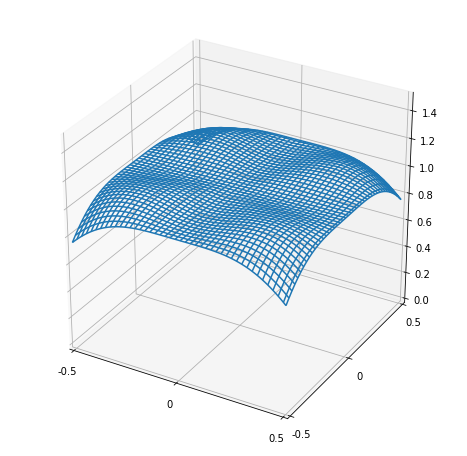

In [3]:
N = 256
h = 2 * np.pi / N
x, y = np.mgrid[-np.pi:np.pi:1j * N, -np.pi:np.pi:1j * N]

omegas = y[0]

def H_kl(shape, omegas, alpha, gamma, h):
    H = np.zeros(shape)
    for k, omega_k in np.ndenumerate(omegas):
        for l, omega_l in np.ndenumerate(omegas):
            tmp1 = 12 * np.sin(omega_k / 2)**2 * np.sin(omega_l / 2)**2 * (1 / omega_k**2 + 1 / omega_l**2)
            tmp2 = np.sin(omega_k / 2)**2 * (2 + np.cos(omega_l)) + np.sin(omega_l / 2)**2 * (2 + np.cos(omega_k)) + \
                    alpha * h**2 / 12 * (2  + np.cos(omega_k)) * (2 + np.cos(omega_l)) + \
                    gamma * 12 * np.sin(omega_k / 2)**2 * np.sin(omega_l / 2)**2
            H[k[0], l[0]] = tmp1 / tmp2
    return H
H = dict()
for i in ([0,0.1,0.5,1]):
    H[i] = H_kl(x.shape, omegas, 0.00001, i, h)
fig = draw_plot(H[0.1])

In [4]:
fig.savefig('/home/satbek/Course-work-sem7/tex/pictures/variational/freq_char/3dcont.png')

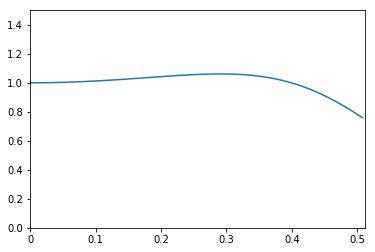

In [5]:
x = np.arange(N/2)
y = [H[0.1][i,i] for i in range(len(H[0.1])//2,len(H[0.1]))]
plt.ylim(0, 1.5)
plt.xlim(0, len(H[0.1])//2 )
plt.xticks(np.arange(0, N//2, N//10), (0,0.1,0.2,0.3,0.4,0.5))
plt.plot(x,y)
plt.figsize=(6,3)
plt.savefig('/home/satbek/Course-work-sem7/tex/pictures/variational/freq_char/2dcont.png')


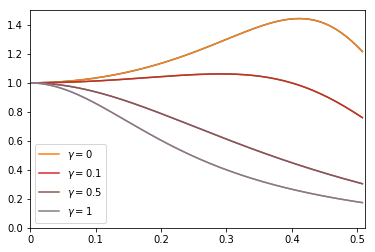

In [6]:
x = np.arange(N/2)
y = dict()
for j in ([0,0.1,0.5,1]):
    y[j] = [H[j][i,i] for i in range(len(H[j])//2,len(H[j]))]
plt.ylim(0, 1.5)
plt.xlim(0, len(H[0.1])//2 )
plt.xticks(np.arange(0, N//2, N//10), (0,0.1,0.2,0.3,0.4,0.5))
legends = []
for i in ([0,0.1,0.5,1]):
    plt.plot(x,y[i])
    z, = plt.plot(x, y[i], label = "$\gamma = {0}$".format(i))
    legends.append(z)
plt.figsize=(6,3)
plt.legend(handles = legends)
plt.savefig('/home/satbek/Course-work-sem7/tex/pictures/variational/freq_char/2dcont4vars.png')


Теперь вторая частотная характеристика
$$g_1 = \frac{1}{(h_1h_2)^2} \sum \limits_{n=1}^{N_1 - 1} \sum \limits_{m=1}^{N_2 - 1} \int \limits _{\Delta_{nm}} u_\xi(\xi,\eta) d\xi d\eta \, \overset{\circ}{\varphi}_{nm}(x,y)$$

$$g_2 = \frac{1}{(h_1h_2)^2} \sum \limits_{n=1}^{N_1 - 1} \sum \limits_{m=1}^{N_2 - 1} \int \limits _{\Delta_{nm}} u_\eta(\xi,\eta) d\xi d\eta \, \overset{\circ}{\varphi}_{nm}(x,y)$$

$$\Delta_{nm} = [x_{n-1}, x_n] \cup [y_{n-1}, y_n] $$
$$\overset{\circ}{\varphi}_{nm}(x,y) = \begin{cases} 1, \, x \in \Delta_{nm} \\ 0, \, else\end{cases}$$


Считаем кучу интегралов, в итоге выходит, что при условии $h_1 = h_2 = h$
$$(g_1, \phi_x) = \frac{4}{\omega_l h^2} sin^2\frac{\omega_k}{2} sin\,\omega_l e^{ikx_n}e^{ily_m}; \; (g_2, \phi_y) = \frac{4}{\omega_k h^2} sin^2\frac{\omega_l}{2} sin\,\omega_k e^{ikx_n} e^{ily_m}$$

$$H_{kl} = \frac{\frac{3}{\omega_l} sin^2\frac{\omega_k}{2} sin\,\omega_l + \frac{3}{\omega_k} sin^2\frac{\omega_l}{2} sin\,\omega_k }
            {sin^2\frac{\omega_k}{2}(2 + cos\omega_l) + sin^2\frac{\omega_l}{2}(2  + cos\omega_k) + \frac{\alpha h^2}{12}(2 + cos\omega_k)(2 + cos\omega_l) + 12\gamma sin^2\frac{\omega_k}{2} sin^2\frac{\omega_l}{2}}$$

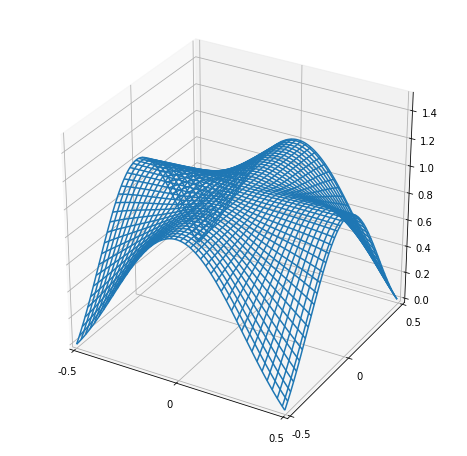

In [39]:
N = 256
h = 2 * np.pi / N
x, y = np.mgrid[-np.pi:np.pi:1j * N, -np.pi:np.pi:1j * N]

omegas = y[0]

def H_kl_new(shape, omegas, alpha, gamma, h):
    H = np.zeros(shape)
    for k, omega_k in np.ndenumerate(omegas):
        for l, omega_l in np.ndenumerate(omegas):
            tmp1 = 3 * (np.sin(omega_k/2)**2 * np.sin(omega_l) / omega_l + np.sin(omega_l/2)**2 * np.sin(omega_k) / omega_k)
#             tmp2 = 4 / 3 /h**2 * (np.sin(omega_k/2)**2 * (2+np.cos(omega_l)) + np.sin(omega_l/2)**2*(2 + np.cos(omega_k))) + \
#                     alpha/9*(2+np.cos(omega_k))*(2+np.cos(omega_l)) + \
#                     gamma * 16/h**2 * np.sin(omega_k / 2)**2 * np.sin(omega_l / 2)**2
            tmp2 = np.sin(omega_k / 2)**2 * (2 + np.cos(omega_l)) + np.sin(omega_l / 2)**2 * (2 + np.cos(omega_k)) + \
                    alpha * h**2 / 12 * (2  + np.cos(omega_k)) * (2 + np.cos(omega_l)) + \
                    gamma * 12 * np.sin(omega_k / 2)**2 * np.sin(omega_l / 2)**2
            H[k[0], l[0]] = tmp1 / tmp2
            
    return H
H = dict()
gammas = [-0.1,0,0.1,0.5,1]
for i in (gammas):
    H[i] = H_kl_new(x.shape, omegas, 0.00001, i, h)
fig = draw_plot(H[0.1])
fig.savefig('/home/satbek/Course-work-sem7/tex/pictures/variational/freq_char/3dpiece.png')

In [40]:
x = np.arange(N/2)
y = [H[i,i] for i in range(len(H)//2,len(H))]
plt.ylim(0, 1.5)
plt.xlim(0, len(H)//2 )
plt.xticks(np.arange(0, N//2, N//10), (0,0.1,0.2,0.3,0.4,0.5))
plt.plot(x,y)
plt.figsize=(6,3)
plt.savefig('/home/satbek/Course-work-sem7/tex/pictures/variational/freq_char/2dpiece.png')

KeyError: (2, 2)

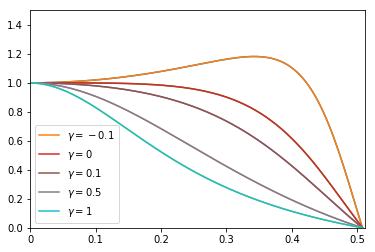

In [41]:
x = np.arange(N/2)
y = dict()


for j in (gammas):
    y[j] = [H[j][i,i] for i in range(len(H[j])//2,len(H[j]))]
plt.ylim(0, 1.5)
plt.xlim(0, len(H[0.1])//2 )
plt.xticks(np.arange(0, N//2, N//10), (0,0.1,0.2,0.3,0.4,0.5))
legends = []
for i in (gammas):
    plt.plot(x,y[i])
    z, = plt.plot(x, y[i], label = "$\gamma = {0}$".format(i))
    legends.append(z)
plt.figsize=(6,3)
plt.legend(handles = legends)
plt.savefig('/home/satbek/Course-work-sem7/tex/pictures/variational/freq_char/2dpiece4vars.png')


# Теперь вместе

In [13]:
N = 256
h = 2 * np.pi / N
x, y = np.mgrid[-np.pi:np.pi:1j * N, -np.pi:np.pi:1j * N]
omegas = y[0]
H = H_kl(x.shape, omegas, 0.00001, 0.1, h)
H_new = H_kl_new(x.shape, omegas, 0.0001, 0.00002, h)



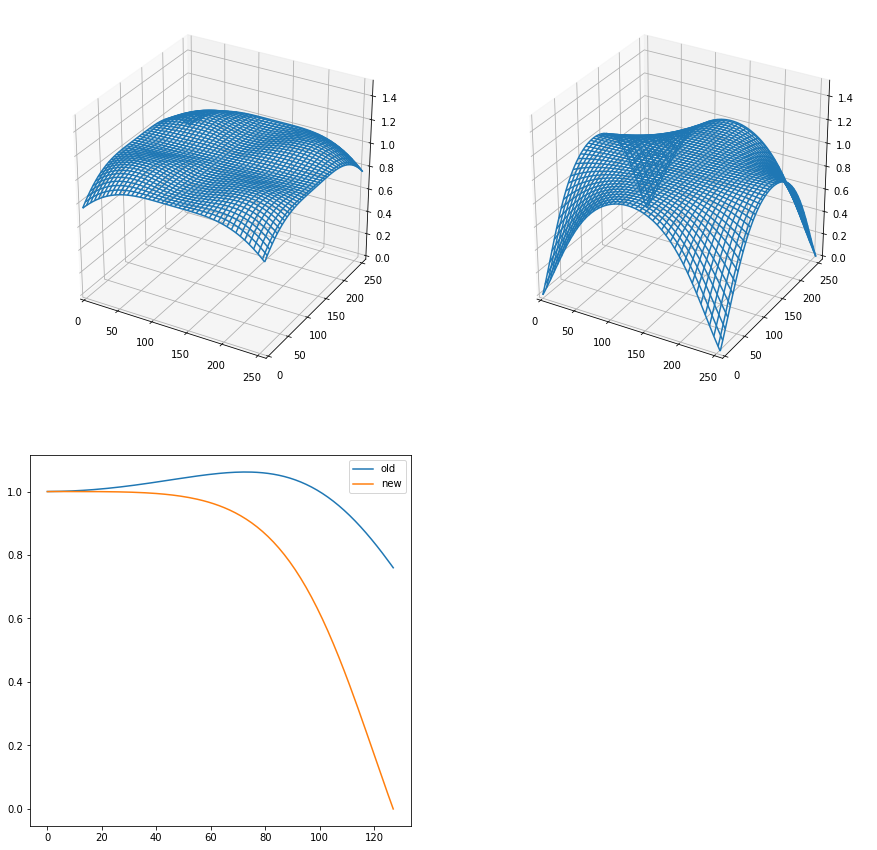

In [14]:
size = H.shape[0]
x, y = np.meshgrid(range(0,size),range(0,size))
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(2, 2, 1, projection = '3d')
ax.plot_wireframe(x, y, H)
ax.set_zlim(0, 1.5)
ax.set_xlim(0,size)
ax.set_ylim(0,size)

ax = fig.add_subplot(2, 2, 2, projection = '3d')
ax.plot_wireframe(x, y, H_new)
ax.set_zlim(0, 1.5)
ax.set_xlim(0,size)
ax.set_ylim(0,size)

x = np.arange(N/2)
y = [H[i,i] for i in range(len(H)//2,len(H))]
y_new = [H_new[i,i] for i in range(len(H)//2,len(H))]

ax = fig.add_subplot(2, 2, 3)
old, = ax.plot(x,y, label = 'old')
new, = ax.plot(x, y_new, label = 'new')
ax.legend(handles = [old, new])

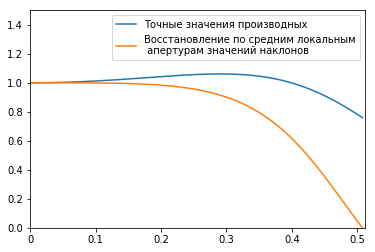

In [26]:
plt.xticks(np.arange(0, N//2, N//10), (0,0.1,0.2,0.3,0.4,0.5))
plt.ylim(0, 1.5)
plt.xlim(0, len(H)//2 )
old, = plt.plot(x,y, label = 'Точные значения производных')
new, = plt.plot(x, y_new, label = "Восстановление по средним локальным\n апертурам значений наклонов")
plt.legend(handles = [old, new])
plt.figsize=(6,3)
plt.savefig('/home/satbek/Course-work-sem7/tex/pictures/variational/freq_char/2cases.png')